<img src="https://media.giphy.com/media/PxSFAnuubLkSA/giphy.gif" width="240" height="360" />


# ML Intermediate Project

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
    - 2.1 [Importing Packages](#section201)<br>
    - 2.2 [Importing the Dataset](#section202)<br>
    - 2.3 [Attributes of Data](#section203)<br>
3. [Pandas Profiling before Data Processing](#section3)
4. [Preprocessing the Data](#section4)
5. [Encoding the Target Variable](#section5)
6. [Train-Test Split](#section6)<br>
7. [Scaling the Data](#section7)<br>
8. [Naive Bayes Classifier](#section8)<br>
9. [Logistic Regression](#section9)<br>
10. [K-nearest Neighbours](#section10)<br>
11. [Decision Tree](#section11)<br>
12. [Random Forest](#section12)<br>
13. [ROC Curve Analysis](#section13)<br>
14. [Comparison of Accuracy, Precision and Recall of Different Models](#section14)<br>
15. [Conclusion](#section15)<br>

<a id=section1></a>

## 1. Problem Statement

**Gender Recognition by Voice and Speech Analysis**\
This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range)\
\
The goal is to build a model to predict to gender by speech analysis. 

<a id=section2></a>

## 2. Data Loading and Description

<a id=section201></a>

### 2.1 Importing packages                                          

In [2]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis

import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline


from subprocess import check_output

<a id=section202></a>

### 2.2 Importing the Dataset

In [3]:
gender_recognision = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv')
gender_recognision.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
gender_recognision.shape

(3168, 21)

- The dataset comprises of __3168 observations of 21 columns__. Below is a table showing names of all the columns and their description.

<img src="https://media.giphy.com/media/5mYcsVrgxtxt7QUc55/giphy.gif" width="1200" height="1800" />


| Column Name      | Description                                                              |
| -------------    |:-------------                                                           :| 
| meanfreq         | mean frequency (in kHz)                                                  | 
| sd               | standard deviation of frequency                                          |  
| median           | median frequency (in kHz)                                                | 
| Q25              | first quantile (in kHz)                                                  |   
| Q75              | third quantile (in kHz)                                                  |
| IQR              | interquantile range (in kHz)                                             |
| skew             | skewness                                                                 |
| kurt             | kurtosis                                                                 |
| sp.ent           | spectral entropy                                                         |
| sfm              | spectral flatness                                                        |                                  | mode             | mode frequency                                                           |
| centroid         | frequency centroid                                                       |
| peakf            | peak frequency (frequency with highest energy)                           |
| meanfun          | average of fundamental frequency measured across acoustic signal         |
| minfun           | minimum fundamental frequency measured across acoustic signal            |
| maxfun           | maximum fundamental frequency measured across acoustic signal            |
| meandom          | average of dominant frequency measured across acoustic signal            |
| mindom           | minimum of dominant frequency measured across acoustic signal            |
| maxdom           | maximum of dominant frequency measured across acoustic signal            |
| dfrange          | range of dominant frequency measured across acoustic signal              |
| modindx          | modulation index                                                         |
| label            | male or female                                                           |

<a id=section203></a>

### 2.3 Attributes of Data

In [7]:
gender_recognision.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

- Column 'label' needs to encoded to 0 and 1.

In [8]:
gender_recognision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


- Data has no missing values.

In [9]:
gender_recognision.describe(include ='all')

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1584
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,NaN
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,NaN
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,NaN
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,NaN
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,NaN
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,NaN


In [10]:
gender_recognision.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [4]:
gender_recognision['label'].unique()

array(['male', 'female'], dtype=object)

In [6]:
gender_recognision['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

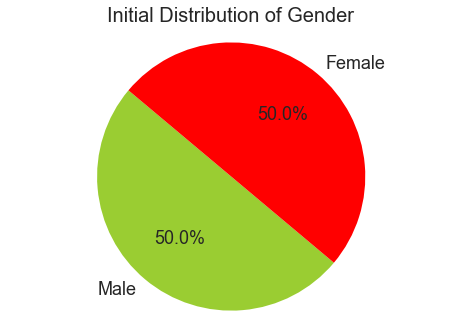

In [69]:
fig, ax = plt.subplots(1, 1)
ax.pie(gender_recognision['label'].value_counts(),autopct='%1.1f%%', labels=['Male','Female'], colors=['yellowgreen','r'], textprops={'fontsize': 18}, startangle =140)
plt.axis('equal')
plt.ylabel('')
plt.title('Initial Distribution of Gender', fontsize = 20)
plt.savefig('Initial Distribution of Gender.png', bbox_inches='tight')

<a id=section3></a>

## 3. Pandas Profiling before Data Processing

In [6]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in e:\anaconda\lib\site-packages (2.4.0)


In [20]:
import pandas_profiling 

In [21]:
from pandas_profiling import ProfileReport

In [22]:
profile = gender_recognision.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing.html")


<a id=section4></a>

## 4. Preprocessing the Data

In [4]:
gender_recognision2 = gender_recognision.copy()

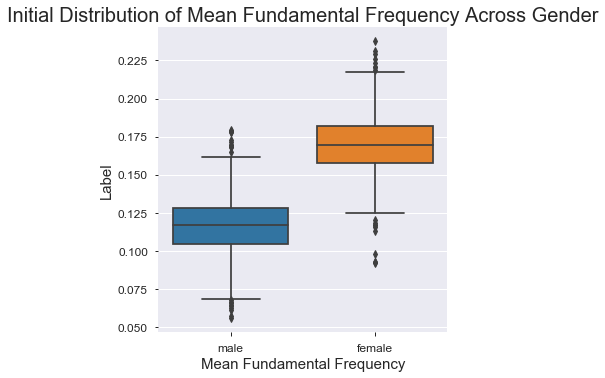

In [70]:
sns.catplot(x= 'label', y = 'meanfun', kind = 'box', data = gender_recognision)
plt.figsize = (15,10)
plt.xlabel('Mean Fundamental Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Label', fontsize = 15)
plt.title('Initial Distribution of Mean Fundamental Frequency Across Gender', fontsize = 20)
plt.savefig('Initial Distribution of Mean Fundamental Frequency Across Gender.jpeg', bbox_inches='tight')

The voiced speech of a typical adult male will have a fundamental frequency from 85 to 180 Hz, and that of a typical adult female from 165 to 255 Hz.\
Source: Wikipedia

#### Deleting rows beyond the given range

In [42]:
gender_recognision2[(gender_recognision2['meanfun']<0.085)&
                    (gender_recognision2['label'] == 'male')].count()

meanfreq    70
sd          70
median      70
Q25         70
Q75         70
IQR         70
skew        70
kurt        70
sp.ent      70
sfm         70
mode        70
centroid    70
meanfun     70
minfun      70
maxfun      70
meandom     70
mindom      70
maxdom      70
dfrange     70
modindx     70
label       70
dtype: int64

In [41]:
gender_recognision2[(gender_recognision2['meanfun']>0.18)&
                    (gender_recognision2['label'] == 'male')].count()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
outlier_male = gender_recognision2[((gender_recognision2['meanfun']<0.085)|(gender_recognision2['meanfun']>0.18))&
                    (gender_recognision2['label'] == 'male')].index
outlier_male

Int64Index([  0,  17,  18,  22,  23,  25,  26,  30,  41,  46,  47,  49,  74,
             83,  84,  85,  86,  87,  88,  89,  91,  92,  95, 100, 102, 121,
            122, 123, 124, 125, 126, 127, 128, 129, 142, 156, 157, 158, 159,
            160, 161, 162, 163, 177, 183, 249, 250, 255, 463, 464, 515, 527,
            531, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 556,
            558, 567, 661, 692, 796],
           dtype='int64')

In [7]:
outlier_female = gender_recognision2[((gender_recognision2['meanfun']<0.165)|(gender_recognision2['meanfun']>0.255))&
                    (gender_recognision2['label'] == 'female')].index
outlier_female

Int64Index([1585, 1586, 1588, 1590, 1591, 1592, 1593, 1595, 1596, 1597,
            ...
            3124, 3125, 3126, 3128, 3130, 3148, 3153, 3155, 3157, 3158],
           dtype='int64', length=640)

In [8]:
index_to_remove = list(outlier_male) + list(outlier_female)
len(index_to_remove)   #Number of rows to be dropped

710

In [9]:
gender_recognision2 = gender_recognision2.drop(index_to_remove, axis = 0)

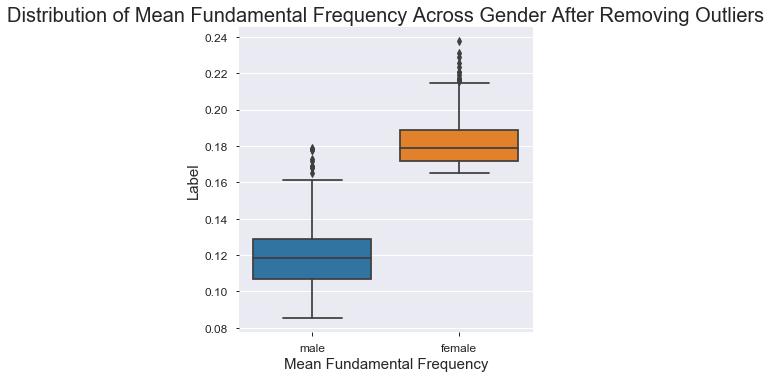

In [71]:
sns.catplot(x= 'label', y = 'meanfun', kind = 'box', data = gender_recognision2)
plt.figsize = (15,10)
plt.xlabel('Mean Fundamental Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Label', fontsize = 15)
plt.title('Distribution of Mean Fundamental Frequency Across Gender After Removing Outliers', fontsize = 20)
plt.savefig('Distribution of Mean Fundamental Across Gender After Removing Outliers.png', bbox_inches='tight')

In [57]:
gender_recognision2[(gender_recognision2['meanfun']>0.16)&
                    (gender_recognision2['label'] == 'male')].count()

meanfreq    14
sd          14
median      14
Q25         14
Q75         14
IQR         14
skew        14
kurt        14
sp.ent      14
sfm         14
mode        14
centroid    14
meanfun     14
minfun      14
maxfun      14
meandom     14
mindom      14
maxdom      14
dfrange     14
modindx     14
label       14
dtype: int64

In [58]:
gender_recognision2[(gender_recognision2['meanfun']>0.215)&
                    (gender_recognision2['label'] == 'female')].count()

meanfreq    16
sd          16
median      16
Q25         16
Q75         16
IQR         16
skew        16
kurt        16
sp.ent      16
sfm         16
mode        16
centroid    16
meanfun     16
minfun      16
maxfun      16
meandom     16
mindom      16
maxdom      16
dfrange     16
modindx     16
label       16
dtype: int64

In [68]:
gender_recognision2.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

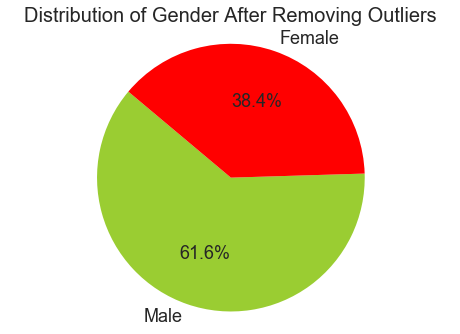

In [72]:
fig, ax = plt.subplots(1, 1)
ax.pie(gender_recognision2['label'].value_counts(),autopct='%1.1f%%', labels=['Male','Female'], colors=['yellowgreen','r'], textprops={'fontsize': 18}, startangle =140)
plt.axis('equal')
plt.ylabel('')
plt.title('Distribution of Gender After Removing Outliers', fontsize = 20)
plt.savefig('Distribution of Gender After Removing Outliers.png', bbox_inches='tight')

#### Looking into variation of centre points of features for the two genders 

In [ ]:
def boxplot(x):
    plot = gender_recognision.boxplot(column = x, by = 'label')
    return plot

In [11]:
def pointplot(column):
    plot = sns.catplot(x= 'label', y = column, kind = 'point', data = gender_recognision2)
    plt.figsize = (15,10)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xlabel('Label', fontsize = 15)
    plt.ylabel(column, fontsize = 15)
    return plot

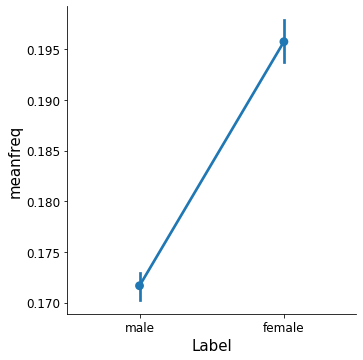

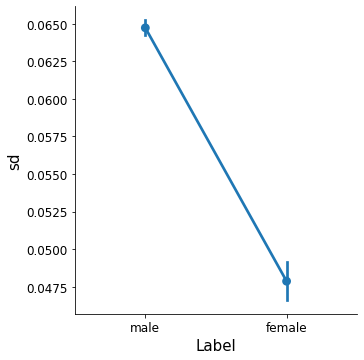

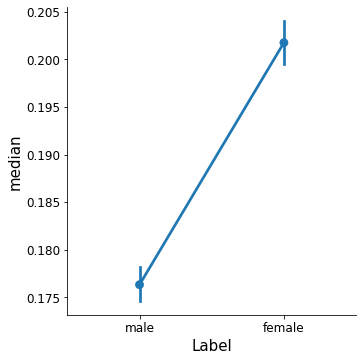

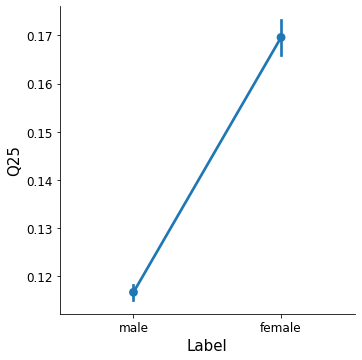

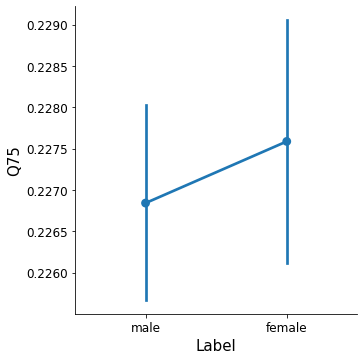

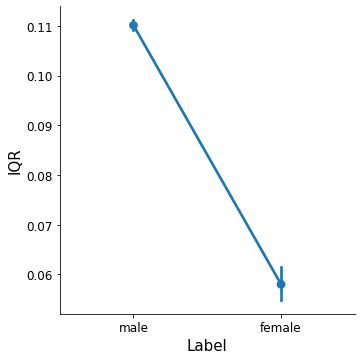

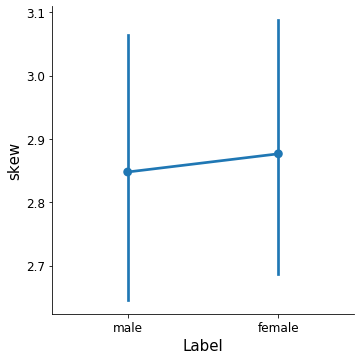

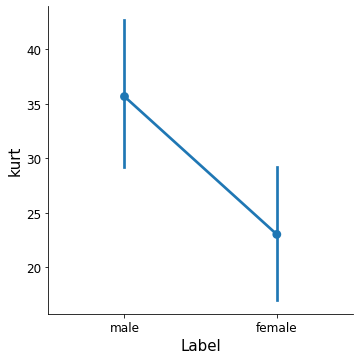

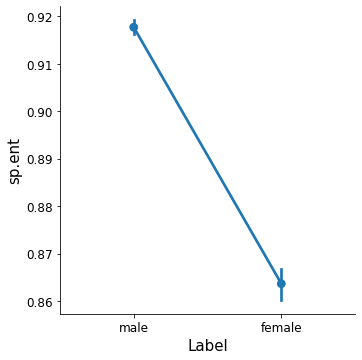

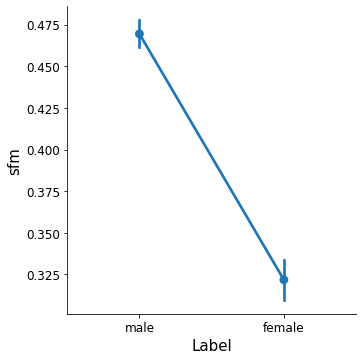

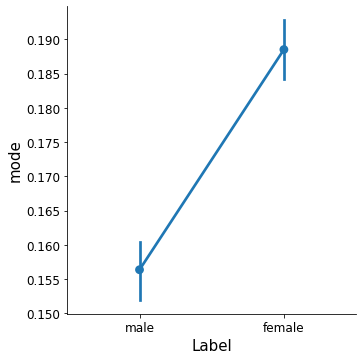

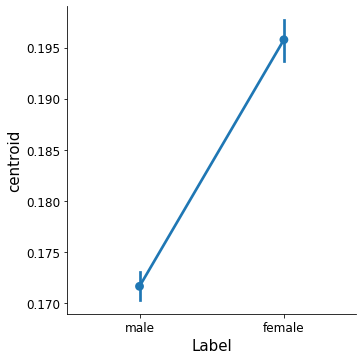

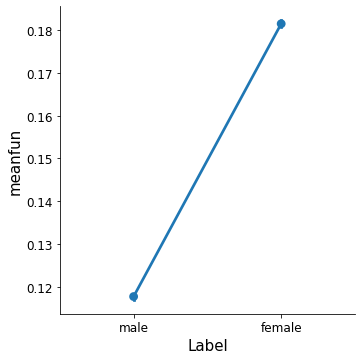

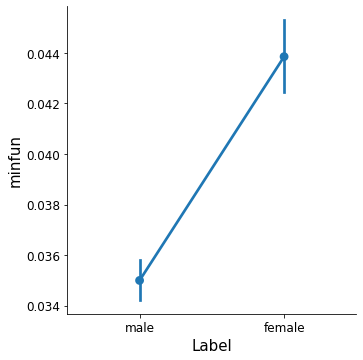

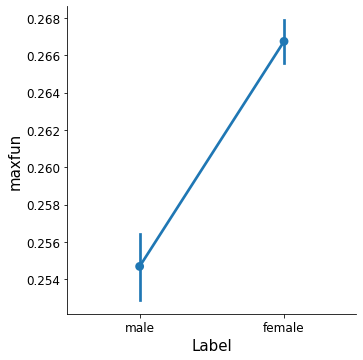

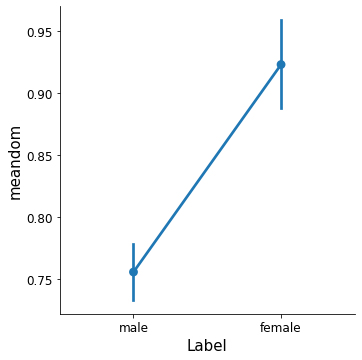

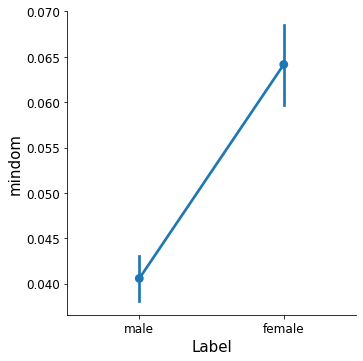

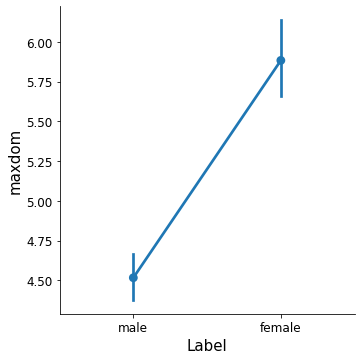

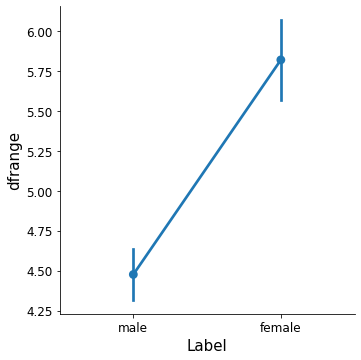

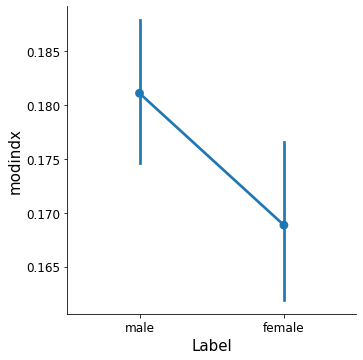

In [25]:
#Looking into variation of centre points of features for the two genders 
pointplot('meanfreq')
pointplot('sd')
pointplot('median')
pointplot('Q25')
pointplot('Q75')
pointplot('IQR')
pointplot('skew')
pointplot('kurt')
pointplot('sp.ent')
pointplot('sfm')
pointplot('mode')
pointplot('centroid')
pointplot('meanfun')
pointplot('minfun')
pointplot('maxfun')
pointplot('meandom')
pointplot('mindom')
pointplot('maxdom')
pointplot('dfrange')
pointplot('modindx')

#### Checking Correlation

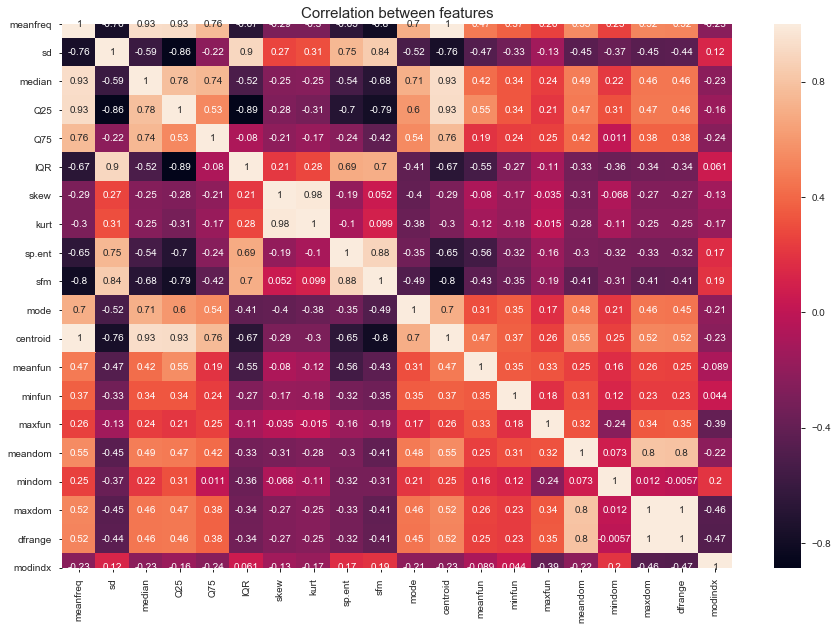

In [96]:
#checking correlation
corr = gender_recognision2.corr()   
plt.figure(figsize=(15,10))
sns.heatmap( gender_recognision2.corr(), annot=True)
plt.title('Correlation between features', fontsize = 15)
plt.savefig('Correlation between features.png',  bbox_inches='tight')

Observations:\
- Skew and Kurtosis are highly correlated.
- IQR and SD are highly correlated.
- Median and Mean Freq are highly correlated.
- Q25 and Mean Freq are highly correlated.
- sd and Q25 are highly correlated.
- centroid and Q25 are highly correlated.
- centroid and median are highly correlated.
- sd and sfm are highly correlated.
- sfm and sfm.ent are highly correlated.

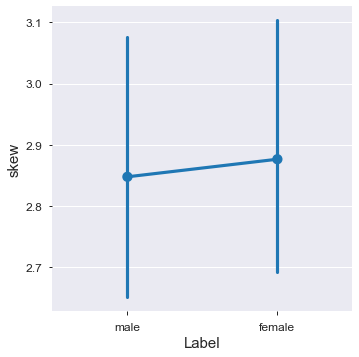

In [113]:
#To look at the variation in the central point of skew for males and females.
pointplot('skew') 

- Slight variation is seen. So, it can be dropped.

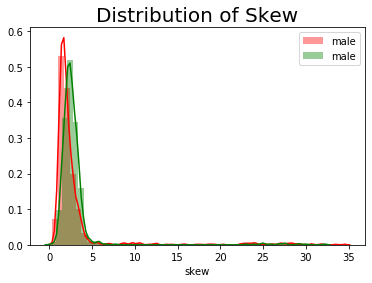

In [16]:
#Draw kde plot with hue
sns.distplot(gender_recognision2['skew'][gender_recognision2.label == 'male'], bins=50, color='r')
sns.distplot(gender_recognision2['skew'][gender_recognision2.label == 'female'], bins=50, color='g')
plt.legend(gender_recognision2.label)
plt.figsize = (15,10)
plt.title('Distribution of Skew', fontsize = 20)
plt.savefig('Distribution of Skew.png', bbox_inches='tight')

So, we drop 'skew' column

Naive Bayse by dropping different columns\
Case 1: All columns\
Case 2: Remove skew\
Case 3: Remove skew and Q75\
Case 4: Remove skew, Q75, Q25, sfm\

In [38]:
gender_recognision2.shape

(2458, 21)

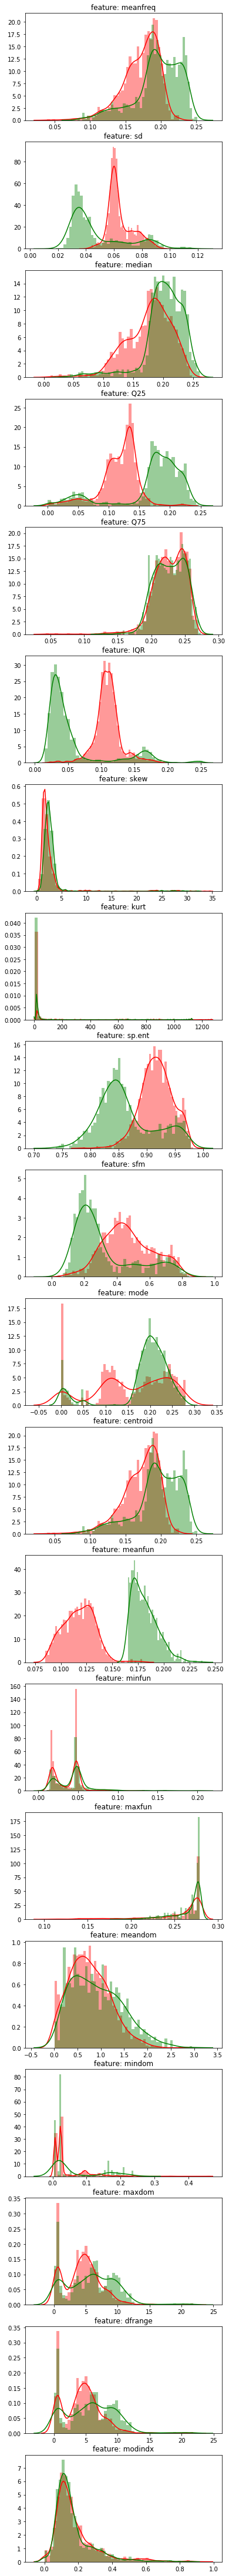

In [40]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(gender_recognision2[gender_recognision2.iloc[:,0:20].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(gender_recognision2[col][gender_recognision2.label == 'male'], bins=50, color='r')
    sns.distplot(gender_recognision2[col][gender_recognision2.label == 'female'], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

<a id=section5></a>

## 5. Encoding the Target Variable

In [29]:
gender_recognision3 = gender_recognision2.copy()

In [34]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
gender_recognision3['label'] = LE.fit_transform(gender_recognision3['label'])
gender_recognision3['label'].head()

1    1
2    1
3    1
4    1
5    1
Name: label, dtype: int64

In [36]:
gender_recognision3.tail(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3156,0.201806,0.036057,0.201622,0.178165,0.227872,0.049707,1.585353,4.945634,0.884731,0.227903,...,0.201806,0.191704,0.032720,0.275862,0.593750,0.007812,5.921875,5.914062,0.124383,0
3159,0.168794,0.085842,0.188980,0.095558,0.240229,0.144671,1.462248,5.077956,0.956201,0.706861,...,0.168794,0.182863,0.020699,0.271186,0.988281,0.007812,5.882812,5.875000,0.268617,0
3160,0.151771,0.089147,0.185970,0.058159,0.230199,0.172040,1.227710,4.304354,0.962045,0.744590,...,0.151771,0.201600,0.023426,0.266667,0.766741,0.007812,4.007812,4.000000,0.192220,0
3161,0.170656,0.081237,0.184277,0.113012,0.239096,0.126084,1.378256,5.431663,0.950750,0.658558,...,0.170656,0.198475,0.160000,0.253968,0.414062,0.007812,0.734375,0.726562,0.336918,0
3162,0.146023,0.092525,0.183434,0.041747,0.224337,0.182590,1.384981,5.118927,0.948999,0.659825,...,0.146023,0.195640,0.039506,0.275862,0.533854,0.007812,2.992188,2.984375,0.258924,0
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,0


<a id=section6></a>

## 6. Train-Test Split

In [42]:
gender_recognision4 = gender_recognision3.copy()

In [43]:
X = gender_recognision4.loc[:,gender_recognision4.columns != 'label']
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160


In [44]:
y = gender_recognision4.label
y.head()

1    1
2    1
3    1
4    1
5    1
Name: label, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [46]:
print(X_train.shape)
print(y_train.shape)

(1966, 20)
(1966,)


<a id=section7></a>

## 7. Scaling the Data


In [97]:
#fit and transform on train data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_s = sc.fit_transform(X_train) 
X_train_s = pd.DataFrame(X_train_s, columns = X.columns)
X_train_s.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.689927,0.417043,0.749821,0.511201,0.844813,0.406374,0.046587,0.002919,0.677702,0.403594,0.411012,0.689927,0.219275,0.196640,1.000000,0.429527,0.040860,0.284079,0.283566,0.105034
1,0.786381,0.418120,0.884194,0.578827,0.923658,0.412532,0.048345,0.002874,0.600013,0.298154,0.946140,0.786381,0.246621,0.187431,1.000000,0.431385,0.040860,0.274419,0.273899,0.114380
2,0.361271,0.653876,0.353733,0.164136,0.627312,0.556276,0.050702,0.005298,0.934428,0.896551,0.023826,0.361271,0.120715,0.040070,0.812953,0.048353,0.006452,0.028980,0.029001,0.354988
3,0.660820,0.427137,0.787622,0.469108,0.806426,0.412907,0.069638,0.006525,0.597313,0.363779,0.756868,0.660820,0.266186,0.188153,0.963958,0.358954,0.040860,0.355993,0.355532,0.103387
4,0.573606,0.432285,0.492596,0.459317,0.783812,0.401153,0.074261,0.007549,0.725006,0.503968,0.404407,0.573606,0.199805,0.235823,0.871236,0.172616,0.000000,0.036315,0.036475,0.595156


In [98]:
#transform on test data
X_test_s = sc.transform(X_test)
X_test_s = pd.DataFrame(X_test_s, columns = X.columns)
X_test_s.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.651504,0.474954,0.700688,0.543614,0.815040,0.343793,0.019281,0.000432,0.860615,0.724210,0.842884,0.651504,0.187924,0.186953,0.990833,0.320499,0.040860,0.192844,0.192266,0.168332
1,0.920271,0.111393,0.894795,0.901435,0.907806,0.061721,0.065629,0.005267,0.270017,0.102565,0.818299,0.920271,0.749238,0.197677,0.972814,0.605143,0.040860,0.395707,0.395274,0.167907
2,0.678948,0.153411,0.672096,0.675202,0.672255,0.068481,0.096145,0.013115,0.387349,0.236525,0.599702,0.678948,0.552311,0.228964,0.659662,0.104681,0.350538,0.080859,0.073756,0.087534
3,0.371406,0.596656,0.347841,0.217981,0.618134,0.491388,0.063026,0.007967,0.906681,0.838495,0.214065,0.371406,0.099282,0.025313,0.880636,0.192943,0.006452,0.194991,0.195131,0.206142
4,0.612658,0.368520,0.691129,0.486689,0.741592,0.331741,0.068964,0.007922,0.666670,0.367514,0.000000,0.612658,0.112292,0.031798,0.626449,0.079958,0.006452,0.031485,0.031507,0.233310


<a id=section8></a>

## 8. Naive Bayes Classifier

In [55]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train_s, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
y_pred_GNB = GNB.predict(X_test_s)

In [81]:
y_pred_prob_GNB = GNB.predict_proba(X_test_s)

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc,roc_auc_score

In [82]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred_GNB)) 
print("recall score: ", recall_score(y_test,y_pred_GNB))
print("precision score: ", precision_score(y_test,y_pred_GNB))
print("f1 score: ", f1_score(y_test,y_pred_GNB))
print("accuracy score: ", accuracy_score(y_test,y_pred_GNB))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob_GNB[:,1])))

test-set confusion matrix:
 [[183   4]
 [  6 299]]
recall score:  0.980327868852459
precision score:  0.9867986798679867
f1 score:  0.9835526315789472
accuracy score:  0.9796747967479674
ROC AUC: 0.9939861488559656


<a id=section9></a>

## 9. Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_s,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
y_pred_logreg = logreg.predict(X_test_s)

In [109]:
y_pred_prob_logreg = logreg.predict_proba(X_test_s)

In [110]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred_logreg)) 
print("recall score: ", recall_score(y_test,y_pred_logreg))
print("precision score: ", precision_score(y_test,y_pred_logreg))
print("f1 score: ", f1_score(y_test,y_pred_logreg))
print("accuracy score: ", accuracy_score(y_test,y_pred_logreg))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob_logreg[:,1])))

test-set confusion matrix:
 [[186   1]
 [  3 302]]
recall score:  0.9901639344262295
precision score:  0.9966996699669967
f1 score:  0.9934210526315789
accuracy score:  0.991869918699187
ROC AUC: 0.9991233453142807


<a id=section10></a>

## 10. K-nearest Neighbours

In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40, p=2, metric='minkowski')

In [152]:
knn.fit(X_train_s, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [153]:
y_pred_knn = knn.predict(X_test_s)

In [154]:
y_pred_prob_knn = knn.predict_proba(X_test_s)

In [158]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred_knn)) 
print("recall score: ", recall_score(y_test,y_pred_knn))
print("precision score: ", precision_score(y_test,y_pred_knn))
print("f1 score: ", f1_score(y_test,y_pred_knn))
print("accuracy score: ", accuracy_score(y_test,y_pred_knn))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob_knn[:,1])))

test-set confusion matrix:
 [[184   3]
 [  3 302]]
recall score:  0.9901639344262295
precision score:  0.9901639344262295
f1 score:  0.9901639344262295
accuracy score:  0.9878048780487805
ROC AUC: 0.9988077496274219


<a id=section11></a>

## 11. Decision Trees

In [171]:
from sklearn import tree
DT = tree.DecisionTreeClassifier(random_state = 0)
DT.fit(X_train_s, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [172]:
y_pred_DT = DT.predict(X_test_s)   

In [173]:
y_pred_prob_DT = DT.predict_proba(X_test_s)

In [174]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred_DT)) 
print("recall score: ", recall_score(y_test,y_pred_DT))
print("precision score: ", precision_score(y_test,y_pred_DT))
print("f1 score: ", f1_score(y_test,y_pred_DT))
print("accuracy score: ", accuracy_score(y_test,y_pred_DT))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob_DT[:,1])))

test-set confusion matrix:
 [[186   1]
 [  1 304]]
recall score:  0.9967213114754099
precision score:  0.9967213114754099
f1 score:  0.9967213114754099
accuracy score:  0.9959349593495935
ROC AUC: 0.9956868589462611


<a id=section12></a>

## 12. Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)

RF.fit(X_train_s, y_train)

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [177]:
y_pred_RF = RF.predict(X_test_s)   

In [178]:
y_pred_prob_RF = RF.predict_proba(X_test_s)

In [179]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred_RF)) 
print("recall score: ", recall_score(y_test,y_pred_RF))
print("precision score: ", precision_score(y_test,y_pred_RF))
print("f1 score: ", f1_score(y_test,y_pred_RF))
print("accuracy score: ", accuracy_score(y_test,y_pred_RF))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob_RF[:,1])))

test-set confusion matrix:
 [[187   0]
 [  1 304]]
recall score:  0.9967213114754099
precision score:  1.0
f1 score:  0.9983579638752053
accuracy score:  0.9979674796747967
ROC AUC: 0.9994740071885684


<a id=section13></a>

## 13. ROC Curve Analysis

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_s, y_train)
    yproba = model.predict_proba(X_test_s)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


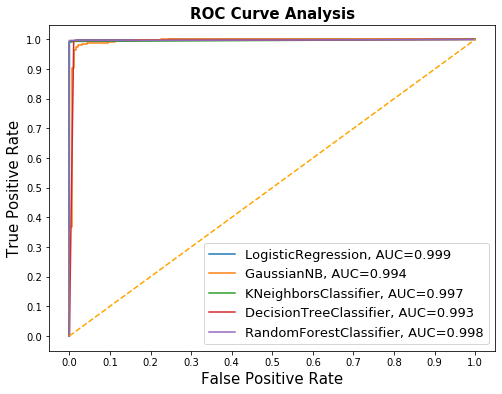

In [128]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

<a id=section14></a>

## 14. Comparison of Accuracy, Precision and Recall of Different Models

In [181]:
recall_GNB = recall_score(y_test,y_pred_GNB)
recall_logreg = recall_score(y_test,y_pred_logreg)
recall_knn = recall_score(y_test,y_pred_knn)
recall_DT = recall_score(y_test,y_pred_DT)
recall_RF = recall_score(y_test,y_pred_RF)

In [197]:
precision_GNB = precision_score(y_test,y_pred_GNB)
precision_logreg = precision_score(y_test,y_pred_logreg)
precision_knn = precision_score(y_test,y_pred_knn)
precision_DT = precision_score(y_test,y_pred_DT)
precision_RF = precision_score(y_test,y_pred_RF)

In [208]:
accuracy_GNB = accuracy_score(y_test,y_pred_GNB)
accuracy_logreg = accuracy_score(y_test,y_pred_logreg)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
accuracy_DT = accuracy_score(y_test,y_pred_DT)
accuracy_RF = accuracy_score(y_test,y_pred_RF)

In [209]:
models = pd.DataFrame({
        'Model'          : ['Gaussian Naive Bayes','Logistic Regression', 'kNN', 'Decision Trees', 'Random Forest'],
        'Recall' : [recall_GNB, recall_logreg, recall_knn, recall_DT, recall_RF],
     'Precision': [precision_GNB, precision_logreg , precision_knn, precision_DT, precision_RF ],
    'Accuracy' : [accuracy_GNB, accuracy_logreg , accuracy_knn, accuracy_DT, accuracy_RF ]
    })
models

,Model,Recall,Precision,Accuracy
0,Gaussian Naive Bayes,0.980328,0.986799,0.979675
1,Logistic Regression,0.990164,0.996700,0.991870
2,kNN,0.990164,0.990164,0.987805
3,Decision Trees,0.996721,0.996721,0.995935
4,Random Forest,0.996721,1.000000,0.997967


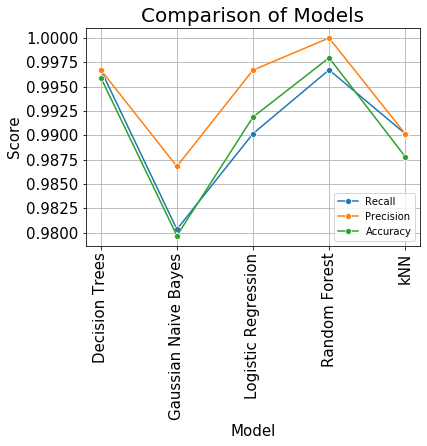

In [226]:
sns.lineplot(data = models, x = 'Model', y = 'Recall', marker = 'o')
sns.lineplot(data = models, x = 'Model', y = 'Precision', marker = 'o')
sns.lineplot(data = models, x = 'Model', y = 'Accuracy', marker = 'o')
plt.figsize = (15,10)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid()
plt.ylabel('Score', fontsize = 15)
plt.xlabel('Model', fontsize = 15)
plt.title('Comparison of Models', fontsize = 20)
plt.savefig('Comparison of Models1.png', bbox_inches='tight')
plt.legend(labels = ['Recall', 'Precision', 'Accuracy'])

<a id = section15></a>

## 15. Conclusion

Clearly, Random Forest Classifier is the best model for prediction.


<img src="https://media.giphy.com/media/l3mZ4YKCsMxRJR3So/giphy.gif" width="1200" height="18000" />
